In [5]:
# https://www.kaggle.com/datasets/gaganmaahi224/appliances-energy-consumption

# Attribute Information:
# date time year-month-day hour:minute:second
# Appliances, energy use in Wh
# lights, energy use of light fixtures in the house in Wh
# T1, Temperature in kitchen area, in Celsius
# RH_1, Humidity in kitchen area, in %
# T2, Temperature in living room area, in Celsius
# RH_2, Humidity in living room area, in %
# T3, Temperature in laundry room area
# RH_3, Humidity in laundry room area, in %
# T4, Temperature in office room, in Celsius
# RH_4, Humidity in office room, in %
# T5, Temperature in bathroom, in Celsius
# RH_5, Humidity in bathroom, in %
# T6, Temperature outside the building (north side), in Celsius
# RH_6, Humidity outside the building (north side), in %
# T7, Temperature in ironing room , in Celsius
# RH_7, Humidity in ironing room, in %
# T8, Temperature in teenager room 2, in Celsius
# RH_8, Humidity in teenager room 2, in %
# T9, Temperature in parents room, in Celsius
# RH_9, Humidity in parents room, in %
# To, Temperature outside (from Chievres weather station), in Celsius
# Pressure (from Chievres weather station), in mm Hg
# RH_out, Humidity outside (from Chievres weather station), in %
# Wind speed (from Chievres weather station), in m/s
# Visibility (from Chievres weather station), in km
# Tdewpoint (from Chievres weather station), Â°C
# rv1, Random variable 1, nondimensional
# rv2, Random variable 2, nondimensional

#### Load Library

In [6]:
# importing essential library
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sn 
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn import model_selection
from sklearn import svm 
from sklearn import linear_model

# removing all form of warning.. 
import warnings
warnings.filterwarnings('ignore')

In [7]:
# viewing all file in the current directory
os.listdir()

['.ipynb_checkpoints',
 'archive (2).zip',
 'energydata_complete.csv',
 'energy_consuption_model.ipynb',
 'energy_consu… (8) - JupyterLab_pdf.pdf']

In [8]:
# loading dataset from drive
eng_df = pd.read_csv('energydata_complete.csv')

# displaying 5 instance of the datapoint
eng_df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [9]:
# view last 5 instance of the dataset
eng_df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


#### Data Eploration Analysis (EDA)

In [10]:
# row and column size 
row , col = eng_df.shape
print('Number of Row or Datapoint : {}'.format(row))
print('Number of Columns or Features : {}'.format(col))

Number of Row or Datapoint : 19735
Number of Columns or Features : 29


In [11]:
# view attribute or columns name
eng_df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [12]:
eng_df.columns = [str(col).lower() for col in eng_df.columns]

In [13]:
# view data columns data
# the data contain both data and time
eng_df.date

0        2016-01-11 17:00:00
1        2016-01-11 17:10:00
2        2016-01-11 17:20:00
3        2016-01-11 17:30:00
4        2016-01-11 17:40:00
                ...         
19730    2016-05-27 17:20:00
19731    2016-05-27 17:30:00
19732    2016-05-27 17:40:00
19733    2016-05-27 17:50:00
19734    2016-05-27 18:00:00
Name: date, Length: 19735, dtype: object

In [14]:
# view essential information about the data 
#  like , numbers of empty value and data type
eng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   t1           19735 non-null  float64
 4   rh_1         19735 non-null  float64
 5   t2           19735 non-null  float64
 6   rh_2         19735 non-null  float64
 7   t3           19735 non-null  float64
 8   rh_3         19735 non-null  float64
 9   t4           19735 non-null  float64
 10  rh_4         19735 non-null  float64
 11  t5           19735 non-null  float64
 12  rh_5         19735 non-null  float64
 13  t6           19735 non-null  float64
 14  rh_6         19735 non-null  float64
 15  t7           19735 non-null  float64
 16  rh_7         19735 non-null  float64
 17  t8           19735 non-null  float64
 18  rh_8         19735 non-null  float64
 19  t9  

In [15]:
# checking for duplicate accross each columns 
for duplication in eng_df.duplicated(): 
    if duplication: 
        print('duplicate')
else:
    print('No duplicate')

No duplicate


In [16]:
# checking for null value
# observation : No null value present the dataset
eng_df.isnull().sum()

date           0
appliances     0
lights         0
t1             0
rh_1           0
t2             0
rh_2           0
t3             0
rh_3           0
t4             0
rh_4           0
t5             0
rh_5           0
t6             0
rh_6           0
t7             0
rh_7           0
t8             0
rh_8           0
t9             0
rh_9           0
t_out          0
press_mm_hg    0
rh_out         0
windspeed      0
visibility     0
tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [17]:
# checking the statistical information in the dataset
eng_df.describe()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


#### Data Visualization

<Axes: >

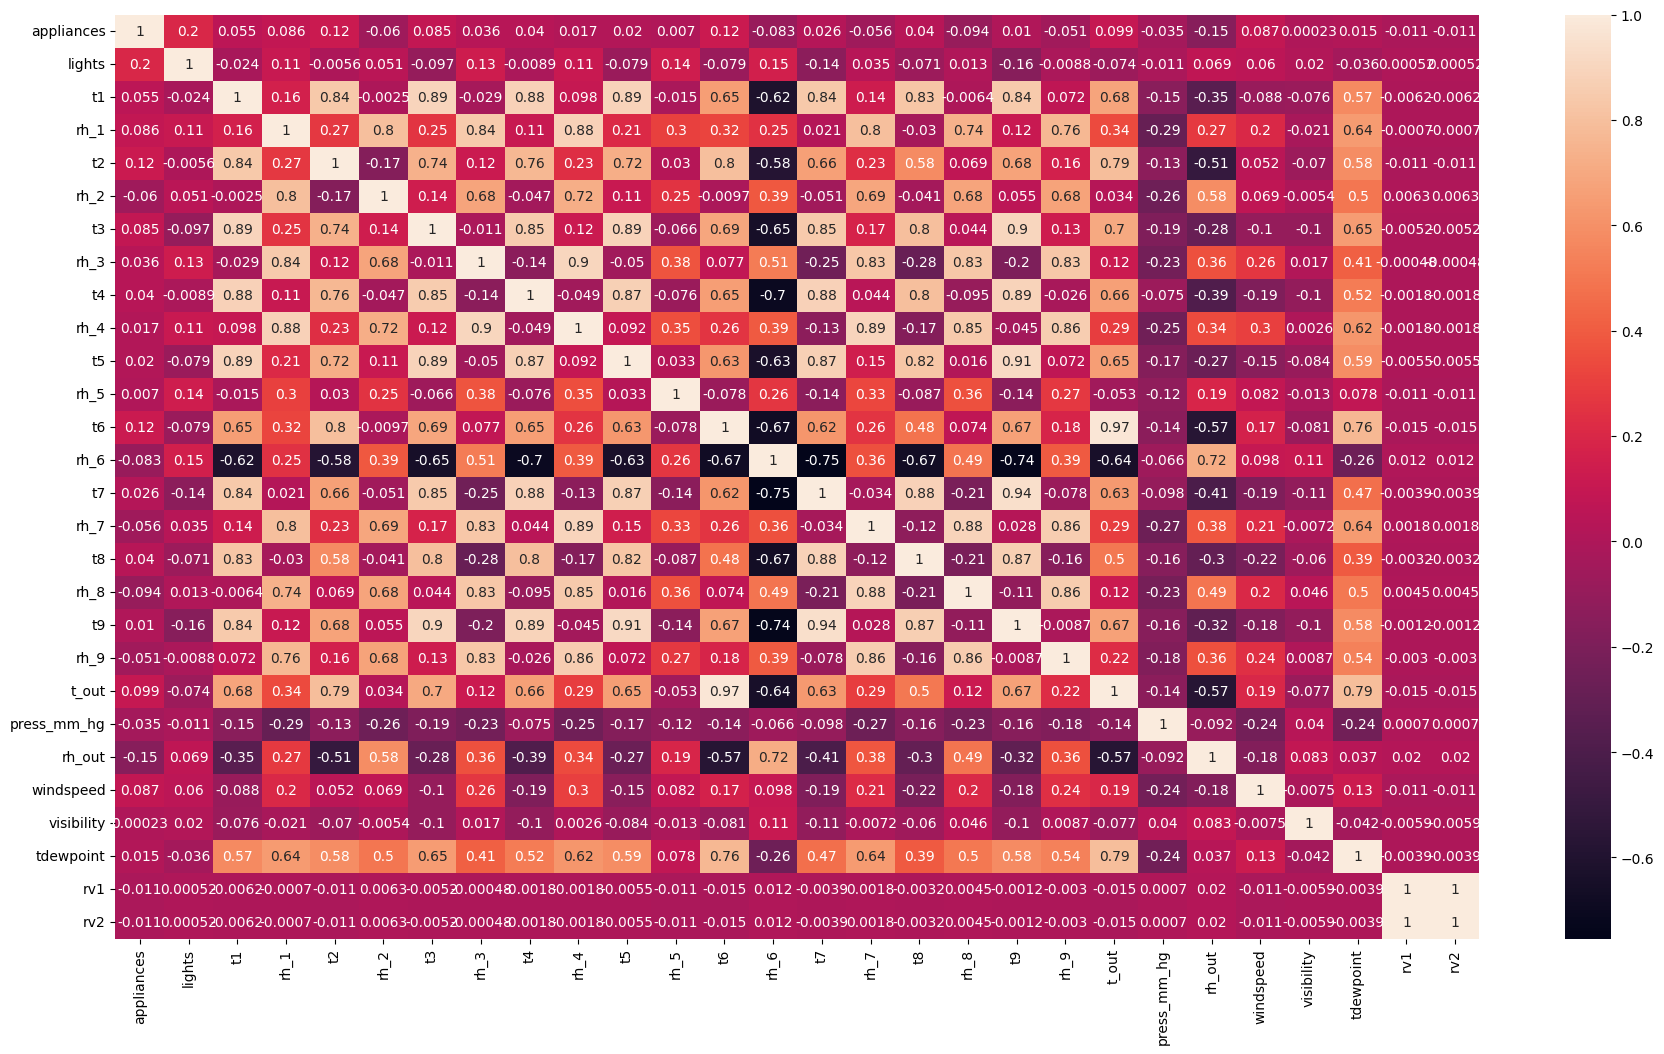

In [18]:
# visualizing correlation among data
plt.figure(figsize=(22,12))
sn.heatmap(eng_df.corr(), annot=True)

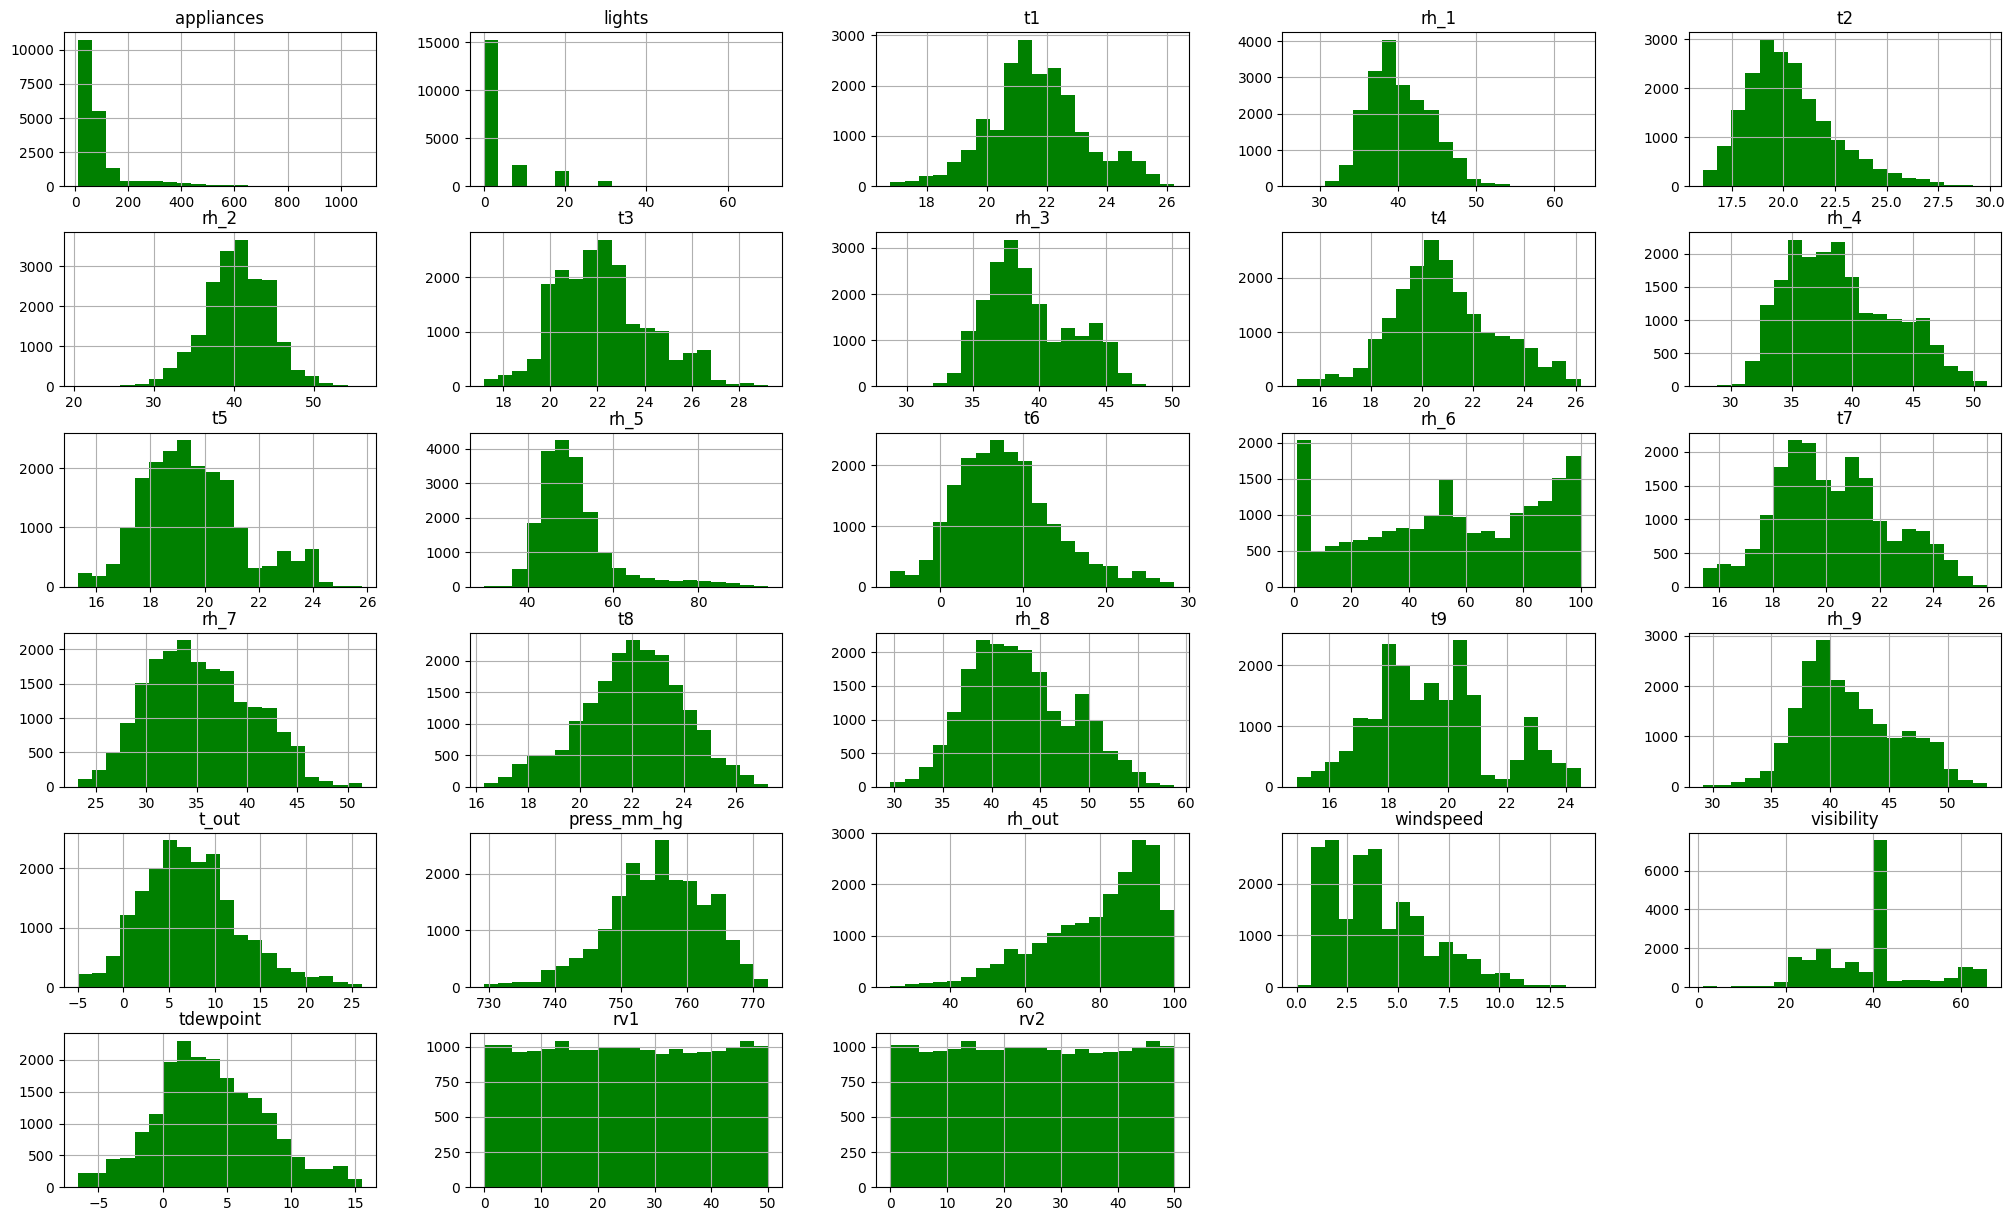

In [19]:
# visualizing data distribution
eng_df.drop(columns=['date']).hist(bins=20, figsize=(25,15), color='green')
plt.show()

In [20]:
# eng_df.lights.plot(kind='hist')

In [21]:
#                                                        Attribute Information:
# date time year-month-day hour:minute:second
# Appliances, energy use in Wh
# lights, energy use of light fixtures in the house in Wh
# T1, Temperature in kitchen area, in Celsius
# RH_1, Humidity in kitchen area, in %
# T2, Temperature in living room area, in Celsius
# RH_2, Humidity in living room area, in %
# T3, Temperature in laundry room area
# RH_3, Humidity in laundry room area, in %
# T4, Temperature in office room, in Celsius
# RH_4, Humidity in office room, in %
# T5, Temperature in bathroom, in Celsius
# RH_5, Humidity in bathroom, in %
# T6, Temperature outside the building (north side), in Celsius
# RH_6, Humidity outside the building (north side), in %
# T7, Temperature in ironing room , in Celsius
# RH_7, Humidity in ironing room, in %
# T8, Temperature in teenager room 2, in Celsius
# RH_8, Humidity in teenager room 2, in %
# T9, Temperature in parents room, in Celsius
# RH_9, Humidity in parents room, in %
# To, Temperature outside (from Chievres weather station), in Celsius
# Pressure (from Chievres weather station), in mm Hg
# RH_out, Humidity outside (from Chievres weather station), in %
# Wind speed (from Chievres weather station), in m/s
# Visibility (from Chievres weather station), in km
# Tdewpoint (from Chievres weather station), Â°C
# rv1, Random variable 1, nondimensional
# rv2, Random variable 2, nondimensional


#                                              observations

In [22]:
# by default the data column is in string instead of Datetime type
sample_date = eng_df.date[0]
print("Data is of type string by default : ", type(sample_date))

Data is of type string by default :  <class 'str'>


In [23]:
# converting date column to dateTime type 
eng_df.date = pd.to_datetime(eng_df.date)
sample_date = eng_df.date[0]
sample_date

Timestamp('2016-01-11 17:00:00')

In [24]:
# visualizing date index column
eng_df.head(2)

,date,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195


In [25]:
# setting data as index 
eng_df.set_index('date', inplace=True)

In [26]:
eng_df.index.day_name().unique()
print("No of unique Day : " , len(eng_df.index.day_of_year))

No of unique Day :  19735


In [27]:
# eng_df.date

In [28]:
# adding some new column for time series analysis
# eng_df['hours'] = eng_df.index.hour
eng_df['weekly'] = eng_df.index.week
eng_df['days_week'] = eng_df.index.weekday
eng_df['day_of_year'] = eng_df.index.day_of_year

In [29]:
import numpy as np

# custom method to generate random colors..
def return_random_color(size=5):
    colors=[]
    for i in range(size): 
        temp_col = np.random.choice(['black', 'red', 'green', 'blue', 'cyan', 'brown', 'gold'])
        colors.append(temp_col)
    return colors

return_random_color(6)

['blue', 'blue', 'brown', 'gold', 'blue', 'red']

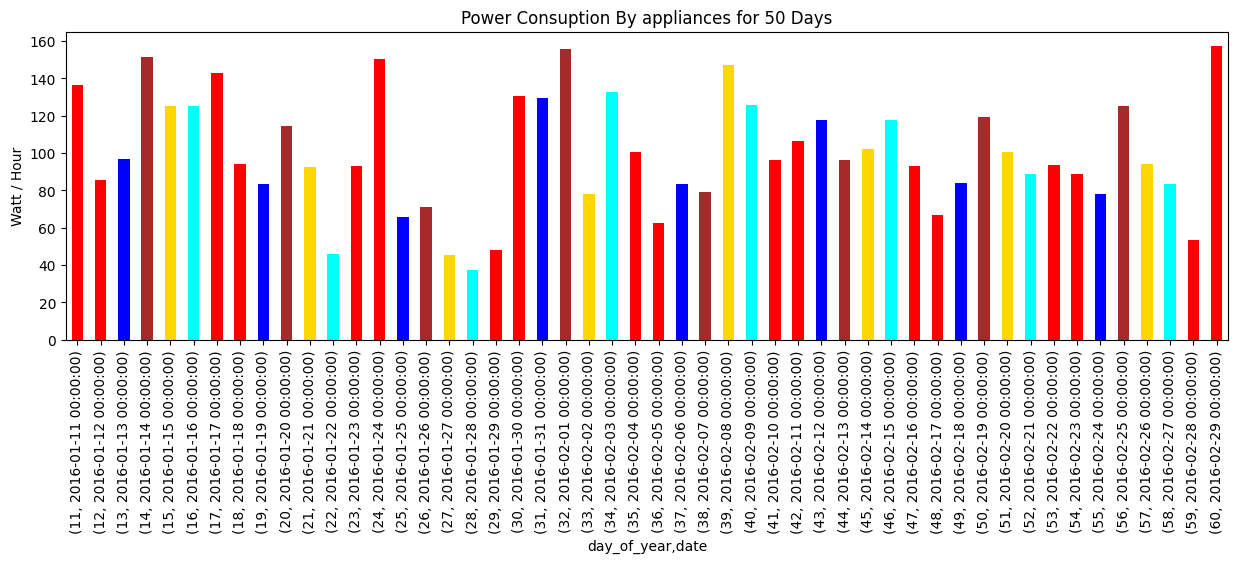

In [30]:
days = 50
plt.figure()
eng_df.groupby('day_of_year')['appliances'].resample('d').mean()[:days].plot(kind='bar', figsize=(15, 4), color=return_random_color(6))
plt.title("Power Consuption By appliances for {} Days".format(days))
plt.ylabel('Watt / Hour')
plt.show()

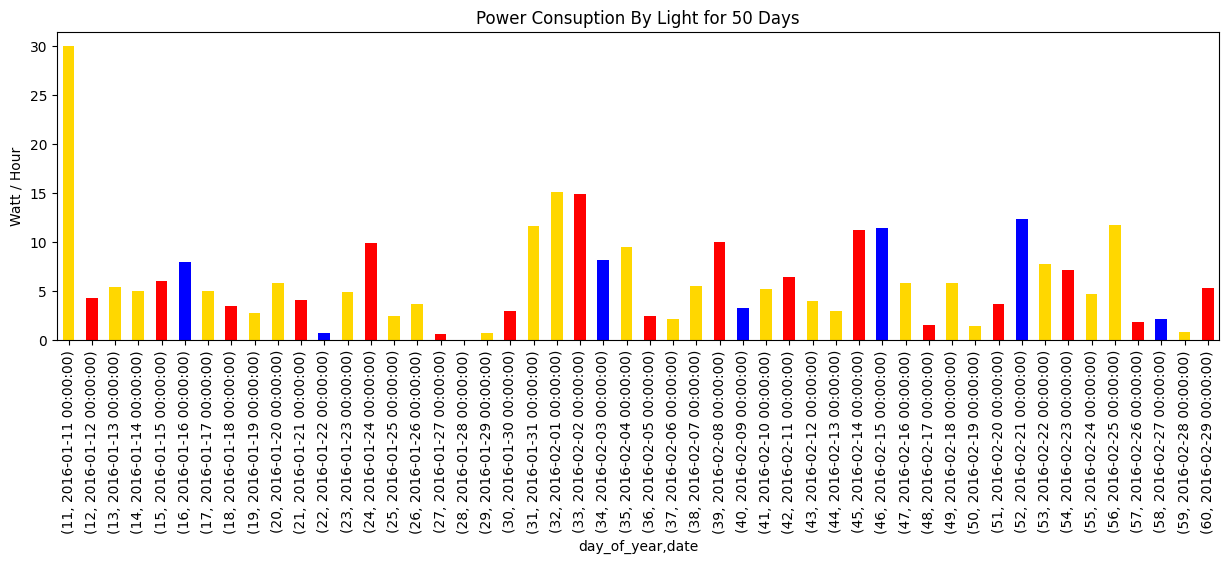

In [31]:
days = 50
plt.figure()
eng_df.groupby('day_of_year')['lights'].resample('d').mean()[:days].plot(kind='bar', figsize=(15, 4), color=return_random_color(6))
plt.title("Power Consuption By Light for {} Days".format(days))
plt.ylabel('Watt / Hour')
plt.show()

In [32]:
# we have 138 unique days in the dataset... 
data = eng_df.groupby('day_of_year')
data.count()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2,weekly,days_week
day_of_year,,,,,,,,,,,,,,,,,,,,,
11,42,42,42,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42
12,144,144,144,144,144,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144
13,144,144,144,144,144,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144
14,144,144,144,144,144,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144
15,144,144,144,144,144,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,144,144,144,144,144,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144
145,144,144,144,144,144,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144
146,144,144,144,144,144,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144


<Axes: xlabel='date'>

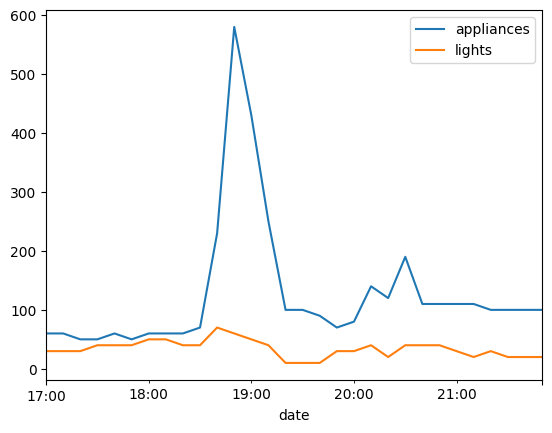

In [40]:
eng_df[['appliances', 'lights']][:30].plot(kind='line', ylabe='')

Text(0.5, 1.0, 'Appliances & Lights Consuption in Watt/Hour')

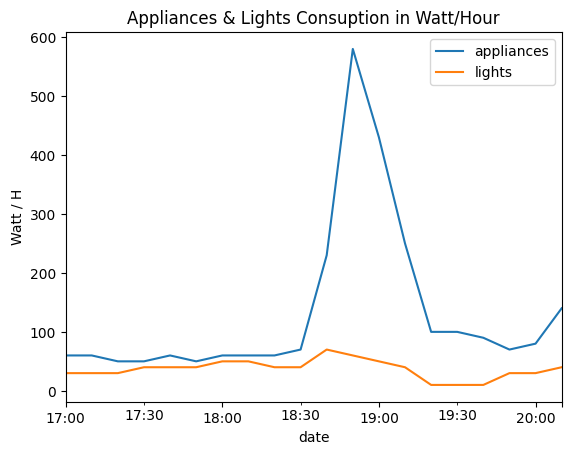

In [33]:
# Appliances, energy use in Wh
# lights, energy use of light fixtures in the house in Wh
eng_df[['appliances', 'lights']][:20].plot(kind='line')
plt.ylabel("Watt / H")
plt.title('Appliances & Lights Consuption in Watt/Hour')

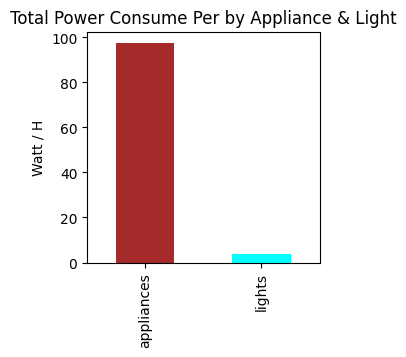

In [29]:
plt.figure(figsize=(3,3))
eng_df[['appliances', 'lights']].mean().plot(kind='bar', color=return_random_color(2))
plt.ylabel("Watt / H")
plt.title('Total Power Consume Per by Appliance & Light')
plt.show()

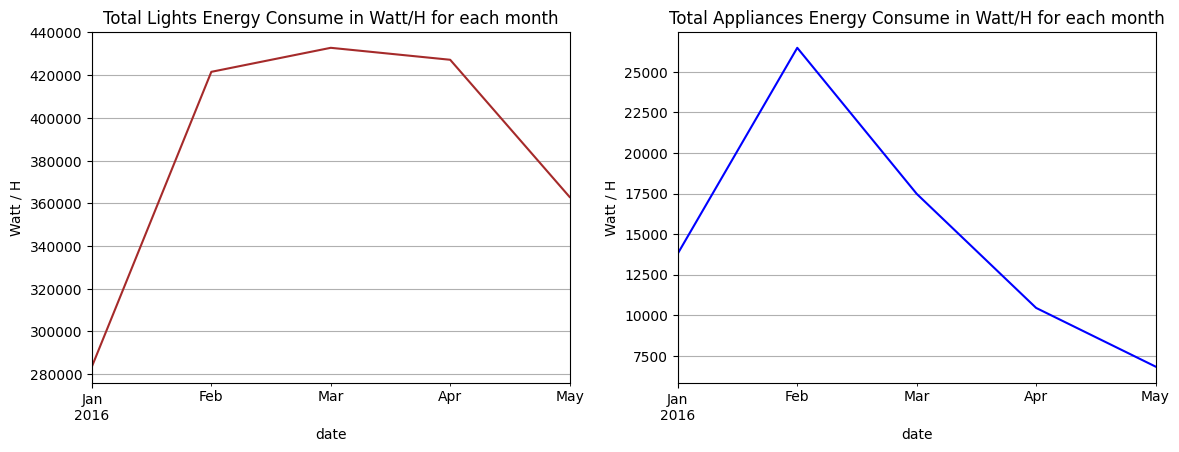

In [30]:
size = (12,4)
fig , ax = plt.subplots(ncols=2)
fig.tight_layout()
eng_df.appliances.resample('m').sum().plot(ax=ax[0], figsize=size, title='Total Lights Energy Consume in Watt/H for each month', ylabel="Watt / H", color=return_random_color(1), grid=True)
eng_df.lights.resample('m').sum().plot(ax=ax[1], figsize=size, title='Total Appliances Energy Consume in Watt/H for each month', ylabel="Watt / H", color=return_random_color(1))
plt.grid()
plt.show()

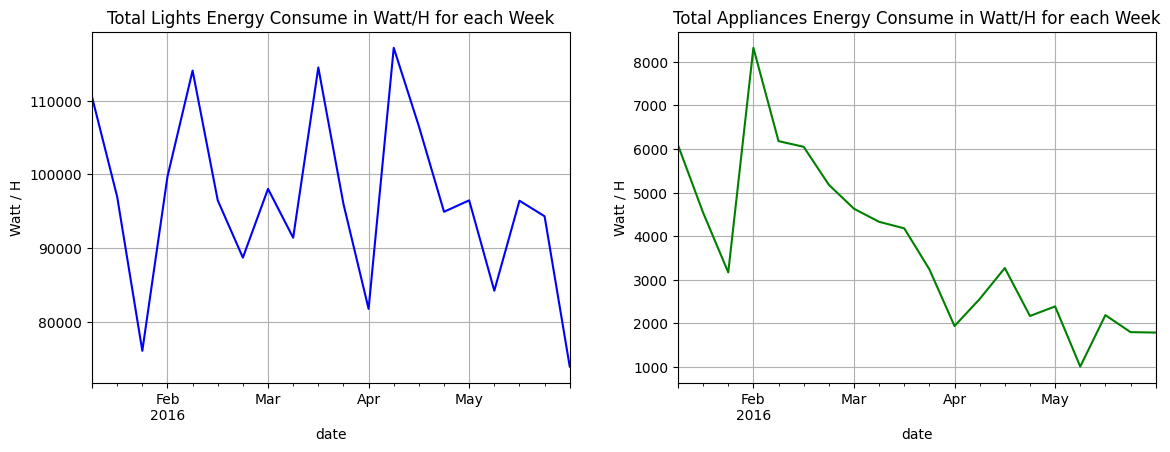

In [31]:
size = (12,4)
fig , ax = plt.subplots(ncols=2)
fig.tight_layout()
eng_df.appliances.resample('w').sum().plot(ax=ax[0], figsize=size, title='Total Lights Energy Consume in Watt/H for each Week', ylabel="Watt / H", color=return_random_color(1), grid=True)
eng_df.lights.resample('w').sum().plot(ax=ax[1], figsize=size, title='Total Appliances Energy Consume in Watt/H for each Week', ylabel="Watt / H", color=return_random_color(1))
plt.grid()
plt.show()

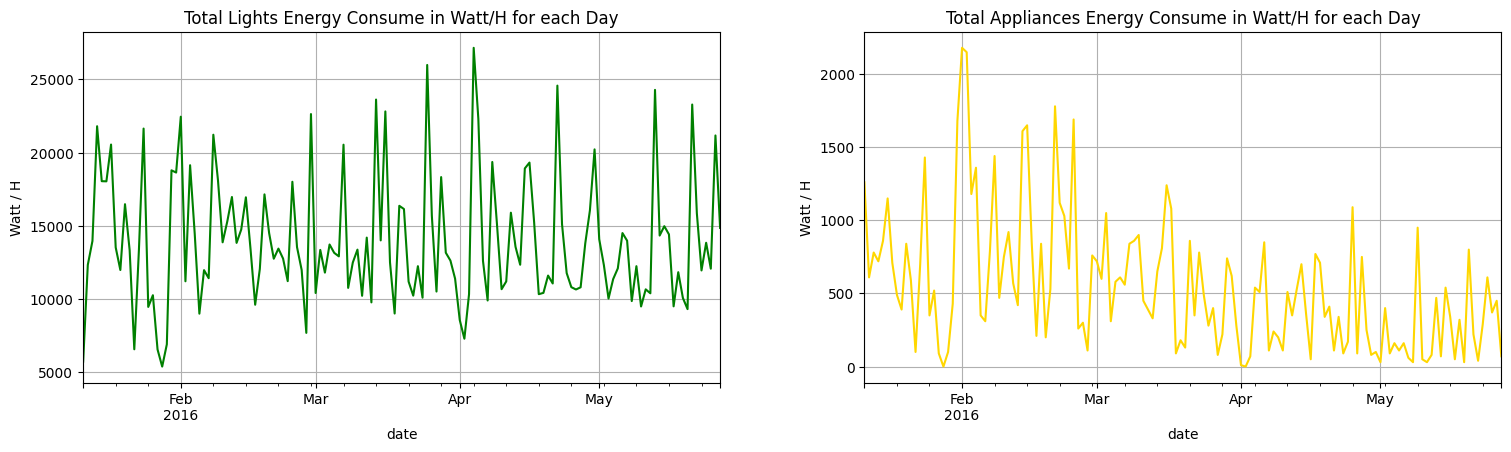

In [32]:
size = (16,4)
fig , ax = plt.subplots(ncols=2)
fig.tight_layout()
eng_df.appliances.resample('d').sum().plot(ax=ax[0], figsize=size, title='Total Lights Energy Consume in Watt/H for each Day', ylabel="Watt / H", color=return_random_color(1), grid=True)
eng_df.lights.resample('d').sum().plot(ax=ax[1], figsize=size, title='Total Appliances Energy Consume in Watt/H for each Day', ylabel="Watt / H", color=return_random_color(1))
plt.grid()
plt.show()

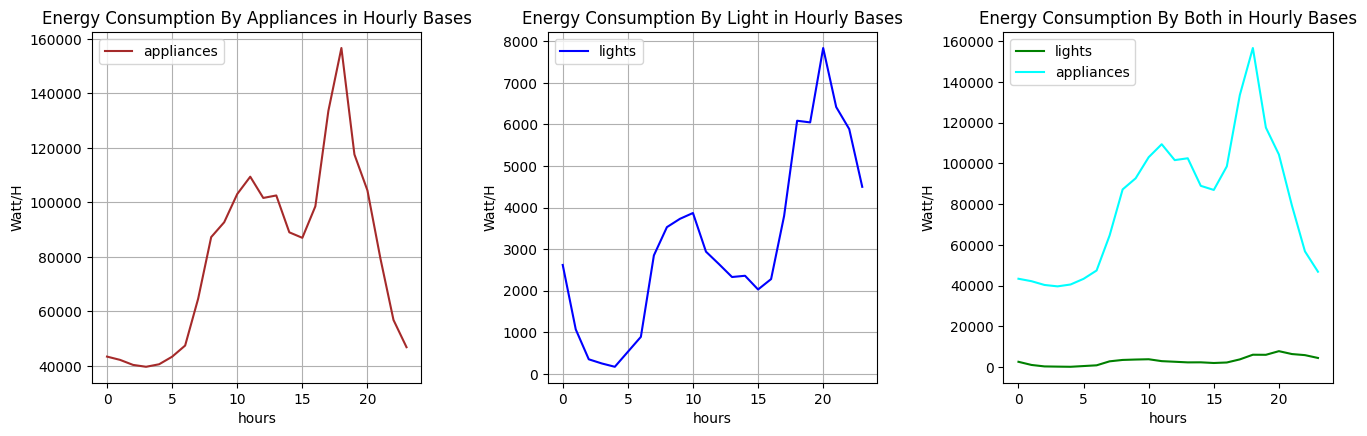

In [33]:
fig, ax = plt.subplots(ncols=3)
plt.tight_layout()
size=(14,4)

eng_df.groupby('hours')[['appliances']].sum().plot(color=return_random_color(2), ax=ax[0] ,figsize=size,  title='Energy Consumption By Appliances in Hourly Bases', ylabel='Watt/H', grid=True )
eng_df.groupby('hours')[['lights']].sum().plot(color=return_random_color(2), ax=ax[1] , figsize=size, title='Energy Consumption By Light in Hourly Bases', ylabel='Watt/H', grid=True)
eng_df.groupby('hours')[['lights', 'appliances']].sum().plot(color=return_random_color(2), ax=ax[2] , figsize=size, title='Energy Consumption By Both in Hourly Bases', ylabel='Watt/H', grid=True)

plt.grid()

### Data Preprocessing

In [34]:
#                      OBSERVATIONS
# 1. looking at some of the attribute value they are highly distributed which might not be good for predicting energy consuptions by appliance or lights at home.. 
# 2. some of the attribute are not correlated or relevance to the outcome of Appliances or light consuption in KW/H....
# 3. Appliance are consuming lots of Energy on hourly, daily, weekly and yearly bases 
# 4. Light consumption of Energy are minimal compare.... 
# 5. No empty record or NULL Value in the dataset.. 
# 6. No duplications of energy consuption record 

#                PREPROCESSING REQUIRED  & SOLUTION TO THE OBSERVATION
# 1. Salling the datapoint of columns that are hightly distributed
# 2. Dimentionality reduction or removal of column that does not contribute much to the power consuption of Appliance or Light 
# 3. Dimentianolity reduction using feature extraction techniques... 
# 4. Droping Date column not require for model prediction 
# 5. Data spliting to Training & Testing Set 
# 6. Prediction model for Light and Appliances Energy Consumption in Houses

In [35]:
# reset back the index and dropping data column
# reset index 
eng_df.reset_index(inplace=True)
eng_df.head(2)

,date,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,...,rh_out,windspeed,visibility,tdewpoint,rv1,rv2,hours,weekly,days_week,day_of_year
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,...,92.0,7.000000,63.000000,5.3,13.275433,13.275433,17,2,0,11
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,...,92.0,6.666667,59.166667,5.2,18.606195,18.606195,17,2,0,11


In [36]:
# droping date related colunm
eng_df = eng_df.drop(columns=['date', 'hours', 'weekly', 'days_week', 'day_of_year'])
eng_df.head(2)

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
0,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195


Data Splitting

In [37]:
X = eng_df.drop(columns=['appliances', 'lights', 'rv1','rv2','visibility','t6','t9'])

# the y output fuature (value to be predicted by model)
y_appliance = eng_df['appliances']
y_light = eng_df['lights']

# print the input features (value supply to the machine learning model)
X.head(2)

,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,t5,rh_5,...,t7,rh_7,t8,rh_8,rh_9,t_out,press_mm_hg,rh_out,windspeed,tdewpoint
0,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,45.566667,17.166667,55.2,...,17.2,41.626667,18.2,48.900000,45.53,6.600000,733.5,92.0,7.000000,5.3
1,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,45.992500,17.166667,55.2,...,17.2,41.560000,18.2,48.863333,45.56,6.483333,733.6,92.0,6.666667,5.2


In [38]:
# Scalling each column using Min Max ScallING
min_max = MinMaxScaler()
for col in X.columns: 
    X[col] = min_max.fit_transform(X[[col]])
# min_max.fit_transform(data)
X.head(2)

,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,t5,rh_5,...,t7,rh_7,t8,rh_8,rh_9,t_out,press_mm_hg,rh_out,windspeed,tdewpoint
0,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,...,0.170594,0.653428,0.173329,0.661412,0.677290,0.372990,0.097674,0.894737,0.50000,0.538462
1,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,...,0.170594,0.651064,0.173329,0.660155,0.678532,0.369239,0.100000,0.894737,0.47619,0.533937


In [39]:
y_appliance = np.log(y_appliance)
y_appliance

0        4.094345
1        4.094345
2        3.912023
3        3.912023
4        4.094345
           ...   
19730    4.605170
19731    4.499810
19732    5.598422
19733    6.040255
19734    6.063785
Name: appliances, Length: 19735, dtype: float64

In [40]:
X['log_appl'] = y_appliance
y_appliance = X.log_appl.astype(float)
X.drop(columns=['log_appl'], inplace=True)
y_appliance

0        4.094345
1        4.094345
2        3.912023
3        3.912023
4        4.094345
           ...   
19730    4.605170
19731    4.499810
19732    5.598422
19733    6.040255
19734    6.063785
Name: log_appl, Length: 19735, dtype: float64

In [41]:
y_appliance.unique()

array([4.09434456, 3.91202301, 4.24849524, 5.43807931, 6.3630281 ,
       6.06378521, 5.52146092, 4.60517019, 4.49980967, 4.38202663,
       4.94164242, 4.78749174, 5.24702407, 4.70048037, 5.99146455,
       5.96614674, 5.48063892, 3.68887945, 3.40119738, 5.7365723 ,
       5.94017125, 5.91350301, 2.99573227, 5.56068163, 6.2146081 ,
       6.10924758, 5.39362755, 5.13579844, 5.66988092, 4.86753445,
       5.29831737, 5.34710753, 5.19295685, 5.85793315, 5.70378247,
       5.82894562, 5.01063529, 5.79909265, 6.04025471, 6.25382881,
       5.88610403, 5.59842196, 6.30991828, 6.5366916 , 6.42971948,
       6.41345896, 6.19440539, 6.01615716, 5.768321  , 6.60665019,
       6.8134446 , 6.23441073, 6.67203295, 6.13122649, 5.07517382,
       6.1737861 , 5.6347896 , 6.32793678, 6.98471632, 6.62007321,
       6.15273269, 6.08677473, 6.68461173, 6.29156914, 6.27287701,
       6.49223984, 6.44571982, 6.39692966, 2.30258509, 6.34563636,
       6.7214257 , 6.97541393, 6.79122146, 6.38012254, 6.74523

Dimenstinality Reduction

In [42]:

# # LASSO REGURALIZATION TECHNIQUES FOR DIMENTINALITY REDUCTION
# # pearson's correlation feature selection for numeric input and numeric output
# # define feature selection
# fs = SelectKBest(score_func=f_regression, k=24)
# # apply feature selection
# X_select = fs.fit_transform(X, y_appliance)
# print(X_select.shape)

In [43]:
# pd.DataFrame(X_select)

Train & testing Data

In [44]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_appliance, test_size=.20)

In [45]:
X_train.shape

(15788, 21)

In [46]:
X_test.shape

(3947, 21)

### Linear Regression Model

In [47]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# this hleper method as copied for evaluating the model perfromance from kaggle
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    r_score = 100*r2_score(test_labels,predictions)
    accuracy = 100 - mape
    print(model,'\n')
    print('Average Error(Mean Absolute Error)       : {:0.4f} degrees'.format(np.mean(errors)))
    print('Variance score R^2  : {:0.2f}%' .format(r_score))
    print('Accuracy            : {:0.2f}%\n'.format(accuracy)) 
    
    return accuracy , np.mean(errors)




In [48]:
logistic_model = linear_model.LinearRegression()
# training the model
logistic_model.fit(X_train, y_train)
# logistic_model.score(X_test, y_test)

LinearRegression()

In [49]:
lr_acc, lr_error  = evaluate(logistic_model, X_test, y_test)

LinearRegression() 

Average Error(Mean Absolute Error)       : 0.4112 degrees
Variance score R^2  : 23.87%
Accuracy            : 90.68%



### Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeRegressor

decision_model = DecisionTreeRegressor()
decision_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [51]:
dt_acc, dt_error = evaluate(decision_model, X_test, y_test)

DecisionTreeRegressor() 

Average Error(Mean Absolute Error)       : 0.2848 degrees
Variance score R^2  : 49.19%
Accuracy            : 93.50%



### Random Forest classifier

In [52]:
from sklearn.ensemble import RandomForestRegressor

random_model = RandomForestRegressor()
random_model.fit(X_train, y_train)

RandomForestRegressor()

In [53]:
rf_acc, rf_error = evaluate(random_model, X_test, y_test)

RandomForestRegressor() 

Average Error(Mean Absolute Error)       : 0.2270 degrees
Variance score R^2  : 73.37%
Accuracy            : 94.80%



#### Gradient Boost Classifier 

In [54]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

ad_boost_model = GradientBoostingRegressor()
ad_boost_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [55]:
ada_acc, ada_error = evaluate(ad_boost_model, X_test, y_test)

GradientBoostingRegressor() 

Average Error(Mean Absolute Error)       : 0.3685 degrees
Variance score R^2  : 36.55%
Accuracy            : 91.65%



#### Model Comparion

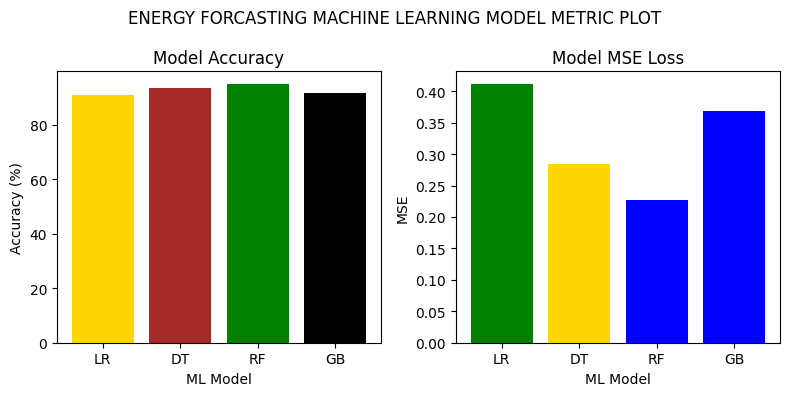

In [56]:
import seaborn as sn 
# lr_acc, lr_error
# dt_acc, dt_error
# rf_acc, rf_error
# ada_acc, ada_error

accuracy_list = [lr_acc, dt_acc, rf_acc, ada_acc]
lost_list = [lr_error, dt_error, rf_error, ada_error]
labels = ['LR', 'DT', 'RF', 'GB']

fig, ax = plt.subplots(ncols=2 , figsize=(8,4))

# plot chart
ax[0].bar(labels, accuracy_list, color=return_random_color())
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('ML Model')
ax[0].set_ylabel('Accuracy (%)')

ax[1].bar(labels, lost_list, color=return_random_color())
ax[1].set_title('Model MSE Loss')
ax[1].set_xlabel('ML Model')
ax[1].set_ylabel('MSE')

plt.suptitle('ENERGY FORCASTING MACHINE LEARNING MODEL METRIC PLOT')
plt.tight_layout()
plt.show()


